LTU MCS5993 by CJ Chung, F2025
# **ES(1+1) with 1/5 Success Rule**

### HW2 Assignment Disclaimer
*	Author Name: First Last
*	LTU ID: 0000xxxxx
*	Work Ownership: This work is my own. It is not copied from classmates (Yes/No): ?
*	AI Assistance: Percentage of code generated with AI tools
(If greater than 0%, briefly describe how AI was used): ?%
*	Understanding: I understand every part of this code (Yes/No):  ?
*	Confidence: I am confident that I can modify, adapt, and extend this code on my own (Yes/No): ?

In [8]:
import numpy as np

def sphere_n(x): # generalized sphere with n variables
    return np.sum(x*x)

# (x+1)(x-1)(x-2)
def findroot(x):
    #return (x[0]**3-2*x[0]**2-x[0]+2)**2
    return abs( (x[0]**3-2*x[0]**2-x[0]+2) )

In [9]:
def booth(x):
    """
    Compute the Booth function for given input vector x.

    Parameters:
    x (tuple or list): Input vector (x1, x2).

    Returns:
    float: The value of the Booth function.
    """
    x1, x2 = x
    term1 = x1 + 2 * x2 - 7
    term2 = 2 * x1 + x2 - 5
    return term1**2 + term2**2

# Example usage
x = (1, 3)  # Example input
print("Booth function value at x =", x, "is", booth(x))


Booth function value at x = (1, 3) is 0


In [10]:
def ackley(x):
    """
    Compute the Ackley function for a given input vector x.

    Parameters:
    x (numpy.ndarray): Input vector.

    Returns:
    float: The value of the Ackley function.
    """
    # Convert x to a numpy array in case it's a list
    x = np.array(x)

    # Number of dimensions
    n = len(x)

    # Compute the Ackley function
    term1 = -20 * np.exp(-0.2 * np.sqrt(np.mean(x**2)))
    term2 = -np.exp(np.mean(np.cos(2 * np.pi * x)))

    # Ackley function value
    result = term1 + term2 + 20 + np.e

    return result

# Example usage
x = np.array([0, 0])
print("Ackley function value at x =", x, "is", ackley(x))


Ackley function value at x = [0 0] is 4.440892098500626e-16


In [11]:
def himmelblau(x):
    """
    Compute the Himmelblau function for a given input vector x.
    It's known for having multiple local minima.
    https://en.wikipedia.org/wiki/Himmelblau%27s_function
    Parameters:
    x (list or tuple): Input vector (x1, x2).

    Returns:
    float: The value of the Himmelblau function.
    """
    x1, x2 = x
    term1 = (x1**2 + x2 - 11)**2
    term2 = (x1 + x2**2 - 7)**2
    return term1 + term2

# Example usage
x = (3, 2)
print("Himmelblau function value at x =", x, "is", himmelblau(x))

Himmelblau function value at x = (3, 2) is 0


In [12]:
def ES11oneFifth(objfunc, numVar, low=-5, high=5, minima=0):
  global totgen, foundCnt
  global X_trajectory, Y_trajectory

  stepSize_i = 0.82 # initial stepsize
  stepSize_r = 0.82 # stepsize change ratio.
  # 0.82 was used previously by Hans-Paul Schwefel, a PhD student of Rechenberg
  xp = np.empty(numVar) # parent
  p_val = 0
  xo = np.empty(numVar) # offspring
  o_val = 0

  successCnt = 0;
  WindowSize = 40

  for j in range(0, numVar):
    xp[j] = np.random.uniform(low, high) # uniform random number to init parent
    # https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/

  #print(f"Initial parent = {xp}")
  p_val = objfunc(xp)     # evaluate the parent
  if numVar==2:
    X_trajectory = np.append(X_trajectory, xp[0])
    Y_trajectory = np.append(Y_trajectory, xp[1])

  stepSize = stepSize_i

  for g in range(1, MaxGen+1):
    if (g % WindowSize) == 0: # update stepsize. Complete lines below,






    # mutate
    for j in range(0, numVar):
      xo[j] =                                                   # <==========

      # to correct if any variation goes out of acceptable range
      if xo[j] < low: xo[j] = low
      elif xo[j] > high: xo[j] = high
    o_val = objfunc(xo)  # evaluate offspring
    #print(xo, o_val)

    # select
    if o_val < p_val: # offspring is better. Complete lines below



      if numVar==2:
        X_trajectory = np.append(X_trajectory, xp[0])
        Y_trajectory = np.append(Y_trajectory, xp[1])

    if p_val < minima+EPSILON:
      #print(f"Acceptable solution found after {g} iterations:")
      totgen += g
      foundCnt += 1
      return xp, p_val, g
  return xp, p_val, g

In [13]:
import matplotlib.pyplot as plt

def plot_contour(obj_func, low=-5, high=5):
  xlist = np.linspace(low, high, 200)
  ylist = np.linspace(low, high, 200)
  X, Y = np.meshgrid(xlist, ylist)
  plt.figure(figsize=(3,3))
  # Evaluate the objective function for each point in the meshgrid
  Z = np.array([[obj_func(np.array([x, y])) for x in xlist] for y in ylist])
  cp = plt.contour(X, Y, Z)
  plt.scatter(X_trajectory[0], Y_trajectory[0], color='blue') # initial p
  plt.scatter(X_trajectory[1:-1], Y_trajectory[1:-1], color='black', s=1) # s: markersize
  plt.scatter(X_trajectory[-1], Y_trajectory[-1], color='red') # -1 indices the last element
  plt.clabel(cp, inline=True, fontsize=10)
  plt.title('Contour Plot')
  plt.xlabel('x0')
  plt.ylabel('x1')
  plt.show()
  return

---------------- findroot2 ---------------
T=0, Min_Eval= 0.00001 at [1.00000632], gen=1016
T=1, Min_Eval= 0.00003 at [2.00000944], gen=1498
T=2, Min_Eval= 0.00002 at [2.00000502], gen=1366
System Success = 100.0%
Avgerage # of generations used = 1,293

---------------- sphere_n ---------------
T=0, Min_Eval= 0.00004 at [ 4.86711734e-04  4.02301854e-03 -2.44914436e-03  1.44283467e-03
 -7.84474253e-05 -1.62282379e-03 -3.99814421e-04 -1.27332571e-04
  4.22905242e-04  7.79189208e-04 -1.39760326e-03 -1.26270169e-03
 -2.14024193e-03 -9.32837862e-04 -7.48129941e-04  2.89771569e-04
 -7.16231505e-04 -7.05439464e-04 -2.29114161e-03  5.70322612e-06], gen=1382
T=1, Min_Eval= 0.00004 at [-0.00046407  0.00344629  0.00032897  0.00050425 -0.00214914  0.00042268
  0.00026882 -0.0004115   0.00316019 -0.00111952  0.0007591  -0.00012328
  0.00232848  0.0003027  -0.00028458 -0.00144004 -0.00146663 -0.00172993
  0.00027397 -0.00146657], gen=1353
T=2, Min_Eval= 0.00005 at [ 1.03855344e-03  2.15064709e-03 -7

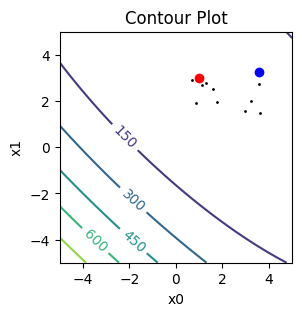

T=1, Min_Eval= 0.00003 at [0.99741715 3.00384483], gen=780


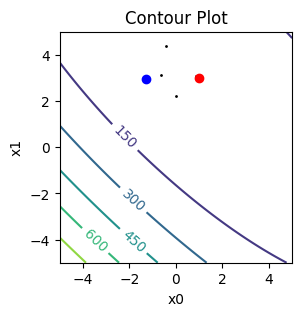

T=2, Min_Eval= 0.00002 at [0.99839888 3.00305433], gen=343


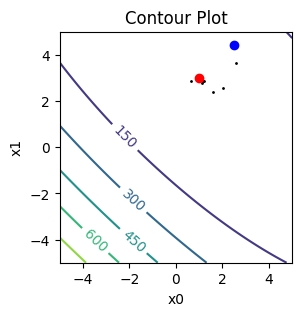

System Success = 100.0%
Avgerage # of generations used = 560

---------------- ackley ---------------
T=0, Min_Eval= 0.00002 at [-4.57895759e-06  4.02745263e-06], gen=1819


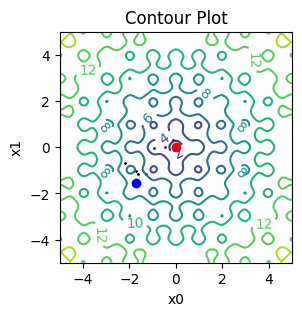

T=1, Min_Eval= 0.00002 at [-6.41934275e-07 -5.31341081e-06], gen=1727


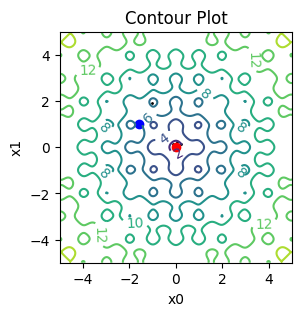

T=2, Min_Eval= 0.00005 at [-4.06699044e-06  1.67554237e-05], gen=1890


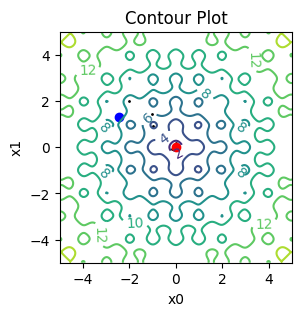

System Success = 100.0%
Avgerage # of generations used = 1,812

---------------- himmelblau ---------------
T=0, Min_Eval= 0.00001 at [2.99952212 2.00041348], gen=924


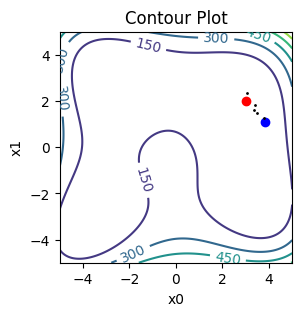

T=1, Min_Eval= 0.00000 at [2.99991188 2.00040288], gen=766


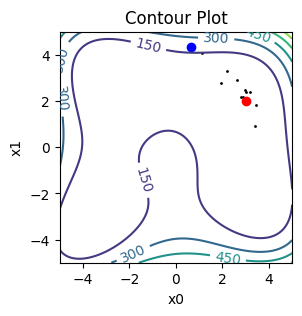

T=2, Min_Eval= 0.00002 at [ 3.58502393 -1.84807062], gen=752


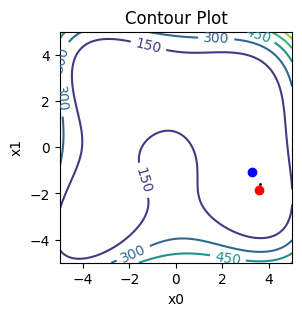

System Success = 100.0%
Avgerage # of generations used = 814



In [14]:
######### M A I N #########
import time
MaxGen = 10000
EPSILON = 0.00005
np.random.seed(int(time.time()))

# 2D minimization functions
MaxTrial = 3
functions = ((findroot, 1), (sphere_n, 20), (booth, 2),(ackley,2),(himmelblau, 2),)

for (func, nv) in functions:
  print(f"---------------- {func.__name__} ---------------")
  totgen = 0
  foundCnt = 0  # acceptable solution found

  for trial in range(0, MaxTrial):
    X_trajectory = np.array([])
    Y_trajectory = np.array([])
    X, eval, g = ES11oneFifth(func, nv)

    print(f"T={trial}, Min_Eval= {eval:.5f} at {X}, gen={g}")
    if nv == 2:
      plot_contour(obj_func=func)
  print(f"System Success = {foundCnt/MaxTrial*100}%")
  totgen += (MaxTrial-foundCnt)*MaxGen
  print(f"Avgerage # of generations used = {(totgen/MaxTrial):,.0f}\n")